<a href="https://colab.research.google.com/github/jcmachicao/curso_intro_nn/blob/main/nn_simple__v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción a Redes Neuronales**
* Autor: José Carlos Machicao
* Licencia: [GestioDinámica](http://www.gestiodinamica.com) 2020

[Tensorflow Playground](https://playground.tensorflow.org)

In [ ]:
import torch
import torch.nn as nn

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt 
import os

In [ ]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

In [ ]:
ruta = 'drive/My Drive/00 data/'
os.listdir(ruta)

In [ ]:
dataset = pd.read_excel(ruta + 'ActosViolentos.xlsx')
dataset.head()

,Edad,Hora,Sexo,Area,Ingreso,Violento
0,Niño,17.0,M,A1,2.0,No Violento
1,Niño,3.0,F,A3,4.0,No Violento
2,Niño,19.0,F,A1,3.0,No Violento
3,Niño,23.0,M,A1,2.0,No Violento
4,Niño,7.0,F,A2,5.0,Violento


In [ ]:
dsd = pd.get_dummies(dataset, drop_first=True)
dsd

,Hora,Ingreso,Edad_AdultoMayor,Edad_Joven,Edad_Niño,Sexo_M,Area_A2,Area_A3,Area_A4,Violento_Violento
0,17.0,2.0,0,0,1,1,0,0,0,0
1,3.0,4.0,0,0,1,0,0,1,0,0
2,19.0,3.0,0,0,1,0,0,0,0,0
3,23.0,2.0,0,0,1,1,0,0,0,0
4,7.0,5.0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
895,0.0,3.0,0,1,0,0,0,0,0,0
896,7.0,2.0,0,0,1,1,0,1,0,0
897,15.0,3.0,1,0,0,1,0,0,1,0
898,8.0,3.0,0,1,0,1,0,0,0,0


In [ ]:
data = dsd

In [ ]:
dataX = data.drop(['Violento_Violento'], axis=1)
datay = data['Violento_Violento']

In [ ]:
scl = MinMaxScaler()
scl.fit(dataX)
dataXf = scl.transform(dataX)
dataXf.shape, type(dataXf)

((900, 9), numpy.ndarray)

In [ ]:
X_np = dataXf.astype(np.float32)
y_np = np.array(datay).reshape(-1, 1).astype(np.float32)

In [ ]:
X = torch.from_numpy(X_np)
y = torch.from_numpy(y_np.reshape(-1, 1))

In [ ]:
X.shape, y.shape

(torch.Size([900, 9]), torch.Size([900, 1]))

In [ ]:
torch.cuda.device_count(), torch.cuda.get_device_name(0)

(1, 'Tesla T4')

In [ ]:
X.shape

torch.Size([900, 9])

In [ ]:
model = nn.Sequential(
  nn.Linear(X.shape[1], 128),
  nn.ReLU(),
  nn.Linear(128, 64),
  nn.ReLU(),
  nn.Linear(64, 8),
  nn.ReLU(),
  nn.Linear(8, 1),
)

In [ ]:
model.cuda()
X_g = X.cuda()
y_g = y.cuda()

In [ ]:
optimizador = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0)
#criterio = torch.nn.CrossEntropyLoss().cuda()
criterio = torch.nn.MSELoss()

In [ ]:
errores = []
nit = 0
EPOCS = 10000

In [ ]:
preds = []
nit += 1
for epo in range(EPOCS):
  optimizador.zero_grad()
  y_pred = model(X_g)
  loss = criterio(y_pred, y_g)
  loss.backward()
  optimizador.step()
  if epo % 1000 == 0:
    print(epo, loss.item())
    errores.append([epo+nit*EPOCS, loss.item()])
    pred = y_pred.cpu().detach().numpy()
    preds.append(pred)

0 0.11342132836580276
1000 0.11224008351564407
2000 0.1109992191195488
3000 0.10972976684570312
4000 0.10845430195331573
5000 0.10712384432554245
6000 0.10575742274522781
7000 0.10431219637393951
8000 0.10279765725135803
9000 0.10122375935316086


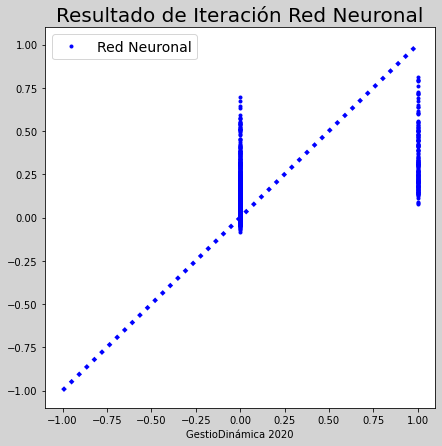

In [ ]:
#@title Gráfica
plt.figure(figsize=(7,7), facecolor='lightgray')

plt.plot(y_np, pred, 'bo', ms=3, label='Red Neuronal')
plt.plot([-1,1], [-1, 1], 'b:', lw=4)

plt.title('Resultado de Iteración Red Neuronal', fontsize=20)
plt.legend(loc='best', fontsize=14)
plt.xlabel('GestioDinámica 2020')
plt.show()

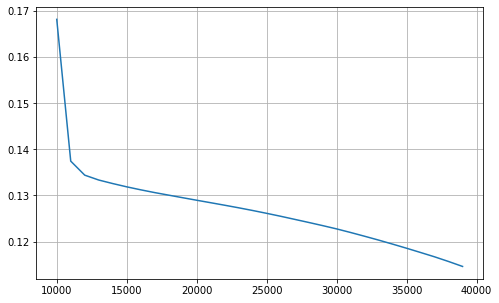

In [ ]:
err_df = pd.DataFrame(errores)
plt.figure(figsize=(8,5), facecolor='white')
plt.plot(err_df[0], err_df[1])
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
mlm = lr.fit(X_np, y_np)
nb = GaussianNB()
mnb = nb.fit(X_np, y_np)
lreg = LinearRegression()
mlreg = lreg.fit(X_np, y_np)
pred_lm = mlm.predict(X_np)
pred_nb = mnb.predict(X_np)
pred_lrm = lreg.predict(X_np)
len(X_np), len(pred_lm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(900, 900)

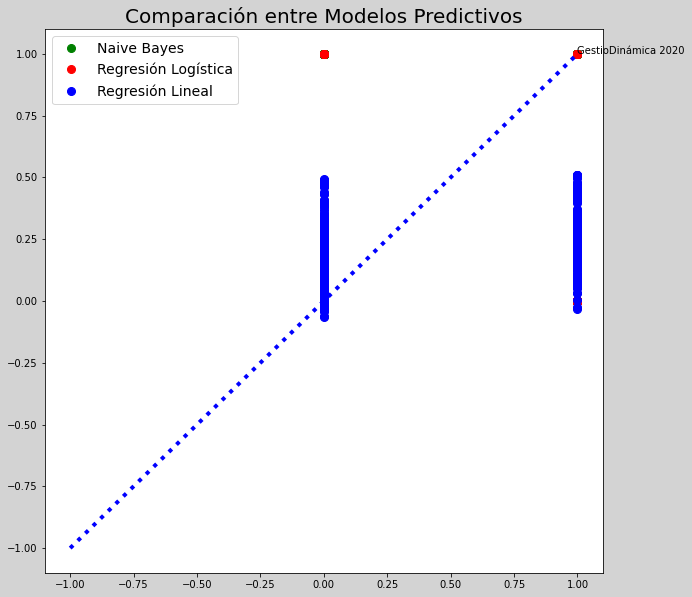

In [ ]:
#@title Gráfica
plt.figure(figsize=(10,10), facecolor='lightgray')

#plt.plot(y_np, pred, 'bo', ms=8, label='Red Neuronal')
plt.plot(y_np, pred_nb, 'go', ms=8, label='Naive Bayes')
plt.plot(y_np, pred_lm, 'ro', ms=8, label='Regresión Logística')
plt.plot(y_np, pred_lrm, 'bo', ms=8, label='Regresión Lineal')
plt.plot([-1,1], [-1, 1], 'b:', lw=4)

plt.title('Comparación entre Modelos Predictivos', fontsize=20)
plt.legend(loc='best', fontsize=14)
plt.text(1,1, 'GestioDinámica 2020')
plt.show()

In [ ]:
data_test = X[0:10].cuda()

In [ ]:
data_test

tensor([[0.7083, 0.2500, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000],
        [0.1250, 0.7500, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000],
        [0.7917, 0.5000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9583, 0.2500, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000],
        [0.2917, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000],
        [0.9167, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.0000, 0.2500, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000],
        [0.6250, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 1.0000, 0.0000],
        [0.0417, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.3750, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],
       device='cuda:0')

In [ ]:
model(data_test)

tensor([[0.0742],
        [0.4353],
        [0.1548],
        [0.0759],
        [0.2543],
        [0.0883],
        [0.0993],
        [0.1050],
        [0.4937],
        [0.1864]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
#print(pred[0:10])
indices = [i for i in range(len(pred)) if pred[i] < 0.45]
len(indices)

858

In [ ]:
data_10 = dataset.iloc[indices,:]
data_10 = data_10.reindex()
data_11 = data_10[['Edad', 'Sexo', 'Area', 'Violento']]
data_12 = data_11[data_11.Violento == 'No Violento']
data_12.head()

,Edad,Sexo,Area,Violento
0,Niño,M,A1,No Violento
1,Niño,F,A3,No Violento
2,Niño,F,A1,No Violento
3,Niño,M,A1,No Violento
5,Adulto,M,A4,No Violento


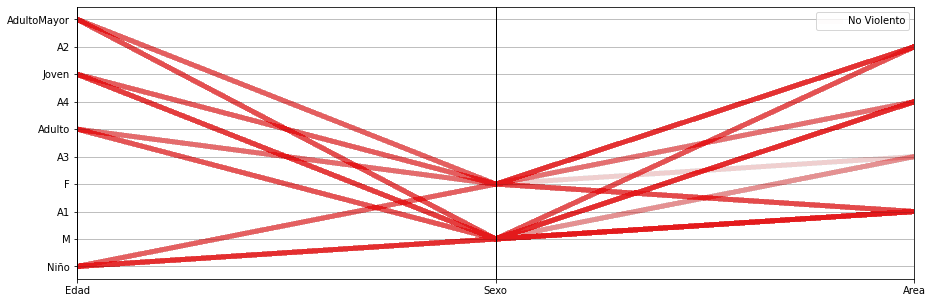

In [ ]:
DATA = data_12
clase = 'Violento'
plt.figure(figsize=(15, 5), facecolor='white')
pd.plotting.parallel_coordinates(DATA, class_column=clase, lw=5, alpha=0.01, colormap='Set1')
plt.legend(loc='best')
plt.show()

### Referencias
https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379
